**constraints**

**x1 + x2 <= 40** 

**x1 + x2 <= 60** 

**x1,x2 >= 0**  


In [1]:
import numpy as np 
import random 
import matplotlib.pyplot as plt


In [2]:
# Defining the objective function 

def objective_function(x1,x2):
    return 4*x1 + 3*x2

# Defining the constraints

def constraint1(x1,x2):
    return x1 + x2 <=40

def constraint2(x1,x2):
    return 2*x1 + x2 <=60

**Genetic Algorithm Function**

In [3]:
def genetic_algorithm(population_size,num_generation):

    # Initialization
    population = []
    fitness_history = []

    for i in range(population_size):
        x1 = random.uniform(0,40)
        x2 = random.uniform(0,60)
        population.append((x1,x2))

    best_solution = None
    best_fitness = float('-inf')

    for generation in range(num_generation):
        # Evaluation
        fitness = [objective_function(x1,x2) for x1, x2 in population]
        
        feasible_population = [individual for individual in population if constraint1(individual[0],individual[1]) and constraint2(individual[0],individual[1])]  
    
        # Selection
        if feasible_population:
            feasible_fitness = [objective_function(x1,x2) for x1, x2 in feasible_population]
            parents = random.choices(feasible_population,weights=feasible_fitness,k=population_size)
        else:
            parents = []
            while len(parents)<population_size:
                potential_parents = random.choice(population,weight=fitness)
                if constraint1(potential_parents[0],potential_parents[1]) and constraint2(potential_parents[0],potential_parents[1]):
                    parents.append(potential_parents)
    
        # Crossover
        offspring = []
        for i in range(population_size):
            parent1,parent2 = random.choices(parents,k=2)
            x1_child = random.uniform(min(parent1[0],parent2[0]),max(parent1[0],parent2[0]))
            x2_child = random.uniform(min(parent1[1],parent2[1]),max(parent1[1],parent2[1]))
            offspring.append((x1_child,x2_child))
    
        # Mutation
        mutation_rate = 1/(generation+1) #Dynamic mutation rate 
        for i in range(population_size):
            if random.random()<mutation_rate:
                offspring[i] = (random.uniform(0,40),random.uniform(0,60))
        # Elitism
        if best_solution is not None:
            offspring[0] = best_solution

        population = offspring

        #finding the best feasible solution
        feasible_solutions = [(x1,x2) for (x1,x2) in population if constraint1(x1,x2) and constraint2(x1,x2)]
        if feasible_solutions:
            best_solution = max(feasible_solutions,key=lambda x: objective_function(x[0],x[1]))
            best_fitness = objective_function(best_solution[0],best_solution[1])
        fitness_history.append(best_fitness)

        print(f"Generation{generation+1}: Best solution = {best_solution},Best fitness = {best_fitness}")

    #plotting the fitness progress
    plt.plot(range(1,num_generation+1), fitness_history)
    plt.xlabel("Generation")
    plt.ylabel("Best Fitness")
    plt.title("Algorithm - Fitness Progress")
    plt.show()

    return best_solution,best_fitness

**Calling the Genetic Algorithm Function**

Generation1: Best solution = (15.821899477892604, 20.76410242894155),Best fitness = 125.57990519839507
Generation2: Best solution = (20.33325575727844, 18.387273810307022),Best fitness = 136.4948444600348
Generation3: Best solution = (20.33325575727844, 18.387273810307022),Best fitness = 136.4948444600348
Generation4: Best solution = (18.663062827471336, 21.234023972933315),Best fitness = 138.3543232286853
Generation5: Best solution = (18.663062827471336, 21.234023972933315),Best fitness = 138.3543232286853
Generation6: Best solution = (18.663062827471336, 21.234023972933315),Best fitness = 138.3543232286853
Generation7: Best solution = (18.663062827471336, 21.234023972933315),Best fitness = 138.3543232286853
Generation8: Best solution = (18.663062827471336, 21.234023972933315),Best fitness = 138.3543232286853
Generation9: Best solution = (18.663062827471336, 21.234023972933315),Best fitness = 138.3543232286853
Generation10: Best solution = (18.663062827471336, 21.234023972933315),Best

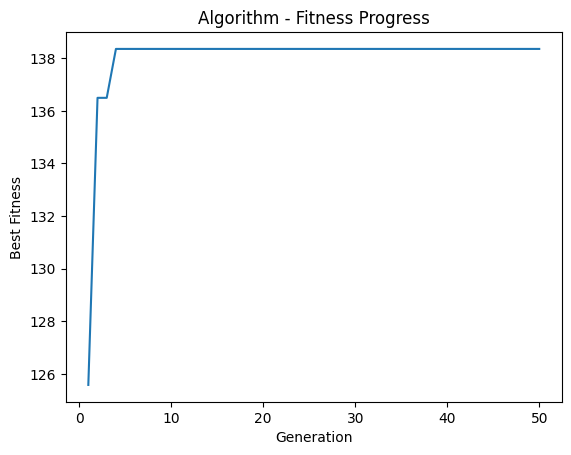

Final best solution: (18.663062827471336, 21.234023972933315)
Final best fitness: 138.3543232286853


In [4]:
population_size = 100
num_generation = 50

best_solution,best_fitness = genetic_algorithm(population_size,num_generation)

if best_solution is not None:
    print("Final best solution:",best_solution)
    print("Final best fitness:",best_fitness)
else:
    print("No feasible solution found within the given constraints")